In [1]:
import pandas as pd

# Load the datasets
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

# Display the first few rows of each dataset
print(listings.head())
print(reviews.head())
print(calendar.head())


        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [2]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 20% missing values
listings = listings.dropna(axis=1, thresh=0.8 * len(listings))

# Fill missing numerical values with the median
num_cols = listings.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
listings[num_cols] = imputer_num.fit_transform(listings[num_cols])

# Fill missing categorical values with the most frequent value
cat_cols = listings.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
listings[cat_cols] = imputer_cat.fit_transform(listings[cat_cols])

# Handle missing values in reviews
reviews = reviews.dropna(subset=['comments'])

# Convert price to numeric
listings['price'] = listings['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Normalize/standardize numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['price', 'bedrooms', 'bathrooms', 'accommodates']
scaler = StandardScaler()
listings[numerical_features] = scaler.fit_transform(listings[numerical_features])

# Encode categorical variables
listings = pd.get_dummies(listings, drop_first=True)

<ipython-input-2-8bca2c47ae8c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings[num_cols] = imputer_num.fit_transform(listings[num_cols])


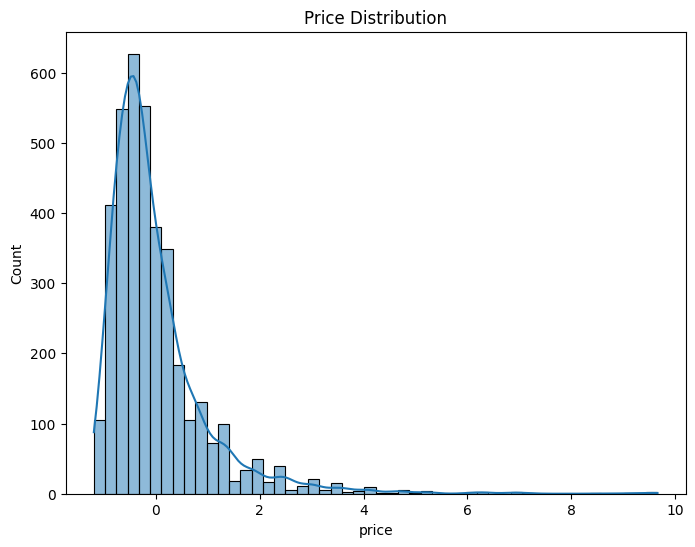

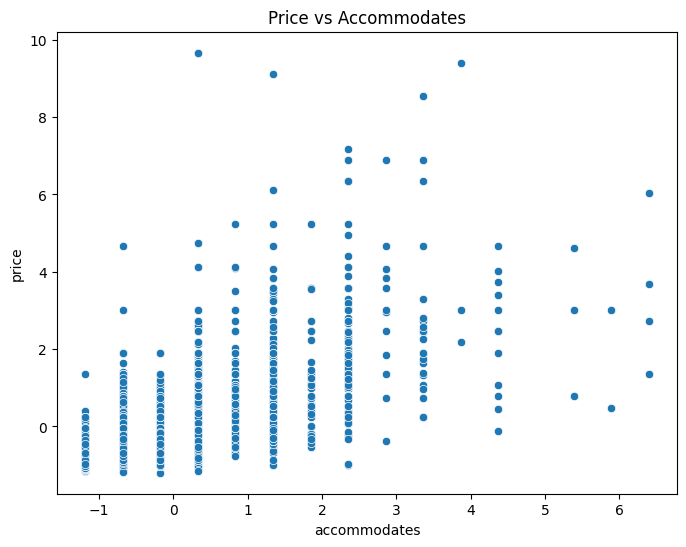

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample the data
# listings_sample = listings.sample(frac=0.1)
# # Calculate the correlation matrix on the sample
# plt.figure(figsize=(12, 8))
# sns.heatmap(listings_sample.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

# Scatter plot of price vs accommodates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='accommodates', y='price', data=listings)
plt.title('Price vs Accommodates')
plt.show()


# Price Prediction

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Define the target and features
target = 'price'
features = listings.drop(columns=['price'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, listings[target], test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R²: {r2_score(y_test, y_pred)}')


RMSE: 0.5889841255918726
R²: 0.6519595709940439


In [6]:
listings.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,last_review_2015-12-30,last_review_2015-12-31,last_review_2016-01-01,last_review_2016-01-02,last_review_2016-01-03,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,241032.0,2.016010e+13,956883.0,3.0,3.0,47.636289,-122.371025,0.329029,-0.438461,-0.348068,...,False,False,False,True,False,False,True,False,False,False
1,953595.0,2.016010e+13,5177328.0,6.0,6.0,47.639123,-122.365666,0.329029,-0.438461,-0.348068,...,False,False,False,False,False,False,False,True,True,True
2,3308979.0,2.016010e+13,16708587.0,2.0,2.0,47.629724,-122.369483,3.869138,5.500872,4.183643,...,False,False,False,False,False,False,False,True,False,False
3,7421966.0,2.016010e+13,9851441.0,1.0,1.0,47.638473,-122.369279,-0.176701,-0.438461,-1.480996,...,False,False,False,True,False,False,False,False,False,False
4,278830.0,2.016010e+13,1452570.0,2.0,2.0,47.632918,-122.372471,1.340489,1.258492,1.917787,...,False,False,False,False,False,False,False,True,False,False


In [7]:
listings["listing_id"] = listings["id"]

In [8]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Sentiment Analysis

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create a new column for sentiment
reviews['sentiment'] = reviews['comments'].apply(lambda x: 1 if 'good' in x.lower() else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(reviews['comments'], reviews['sentiment'], test_size=0.2, random_state=42)

# Naive Bayes model with text vectorization
nb_model = make_pipeline(CountVectorizer(), MultinomialNB())
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97     14884
           1       0.73      0.94      0.82      2083

    accuracy                           0.95     16967
   macro avg       0.86      0.95      0.90     16967
weighted avg       0.96      0.95      0.95     16967

